In [25]:
import pandas as pd

# Muat dataset
df = pd.read_csv("ecommerce_customer.csv")

# dataset memiliki 100.000 entri
if len(df) < 250000:
    print("Dataset memiliki kurang dari 100.000 entri.")
else:
    #  250.000 entri pertama
    df = df.head(250000)

# menampilkan setiap baris data satu per satu dengan nomor
for index, row in df.iterrows():
    print(f"Data ke-{index + 1}:")
    print(row.to_frame().T.to_string(index=False), end="\n\n")



Streaming output truncated to the last 5000 lines.
Data ke-248751:
Customer ID       Purchase Date Product Category Product Price Quantity Total Purchase Amount Payment Method Customer Age Returns Customer Name Age Gender Churn
      19815 2022-12-17 12:01:40             Home            19        1                   772         PayPal           41     1.0  Samuel Kelly  41   Male     0

Data ke-248752:
Customer ID       Purchase Date Product Category Product Price Quantity Total Purchase Amount Payment Method Customer Age Returns Customer Name Age Gender Churn
      19815 2023-09-14 00:03:39             Home           254        2                  4257           Cash           41     1.0  Samuel Kelly  41   Male     0

Data ke-248753:
Customer ID       Purchase Date Product Category Product Price Quantity Total Purchase Amount Payment Method Customer Age Returns Customer Name Age Gender Churn
      19815 2021-09-21 06:32:00         Clothing           402        4                  4267 

In [34]:
import pandas as pd

# Muat dataset
df = pd.read_csv("ecommerce_customer.csv")

print("Sebelum normalisasi:")
print(df['Returns'].isnull().sum())  # Menampilkan jumlah nilai kosong pada kolom 'Returns'

# Mengganti NaN dengan median dari kolom 'Returns'
median_value = df['Returns'].median()  # Hitung median
df['Returns'] = df['Returns'].fillna(median_value)
# Menngecek nilai kosong setelah normalisasi
print("\nSetelah normalisasi:")
print(df['Returns'].isnull().sum())  # Memastikan tidak ada nilai kosong lagi

# Menampilkan 100.000 data terakhir
last_100k = df.tail(100000)  # Ambil 100.000 baris terakhir dari dataset

# Set opsi Pandas untuk memastikan semua kolom dan baris ditampilkan
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.width', 1000)  # Lebar tampilan kolom

# Tampilkan data 100.000 baris terakhir
print("\n100.000 Data Terakhir setelah Normalisasi:")
print(last_100k)

# Simpan dataset ke file CSV (opsional)
last_100k.to_csv("last_100k_data.csv", index=False)
print("\nData berhasil disimpan ke file 'last_100k_data.csv'")



Streaming output truncated to the last 5000 lines.
245002         9286  2020-02-18 20:28:57      Electronics            116         1                   3850    Credit Card            45      0.0               Michelle Woods   45  Female      1
245003         9286  2022-09-13 20:36:37      Electronics            493         2                   3884    Credit Card            45      1.0               Michelle Woods   45  Female      1
245004         9924  2021-01-29 04:59:07             Home            128         1                   2496           Cash            61      0.0              Katelyn Johnson   61  Female      0
245005         9924  2020-06-26 16:24:19             Home            253         3                    803    Credit Card            61      0.0              Katelyn Johnson   61  Female      0
245006         9924  2022-10-29 20:51:54             Home            147         3                   4257    Credit Card            61      0.0              Katelyn Johnson   61

In [39]:
import pandas as pd

# Muat dataset
df = pd.read_csv("ecommerce_customer.csv")

print("Nama kolom dalam dataset:")
print(df.columns)

# menganti 'Customer Name' dengan nama kolom yang benar sesuai dataset
if 'Customer Name' in df.columns:
    # Standarisasi nama pelanggan menjadi huruf kapital
    df['Customer Name'] = df['Customer Name'].str.upper()

    # menampilkan 10 data pertama untuk verifikasi
    print("\n10 Data Pertama setelah Standarisasi:")
    print(df.head(10))

    # Simpan dataset yang sudah diubah ke file baru
    df.to_csv("ecommerce_customer_modified.csv", index=False)
    print("\nData berhasil disimpan ke file 'ecommerce_customer_modified.csv'")
else:
    print("\nKolom 'Customer Name' tidak ditemukan dalam dataset. Periksa nama kolom Anda.")



Nama kolom dalam dataset:
Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'], dtype='object')

10 Data Pertama setelah Standarisasi:
   Customer ID        Purchase Date Product Category  Product Price  Quantity  Total Purchase Amount Payment Method  Customer Age  Returns        Customer Name  Age  Gender  Churn
0        46251  2020-09-08 09:38:32      Electronics             12         3                    740    Credit Card            37      0.0  CHRISTINE HERNANDEZ   37    Male      0
1        46251  2022-03-05 12:56:35             Home            468         4                   2739         PayPal            37      0.0  CHRISTINE HERNANDEZ   37    Male      0
2        46251  2022-05-23 18:18:01             Home            288         2                   3196         PayPal            37      0.0  CHRISTINE HERNANDEZ   37    Male     

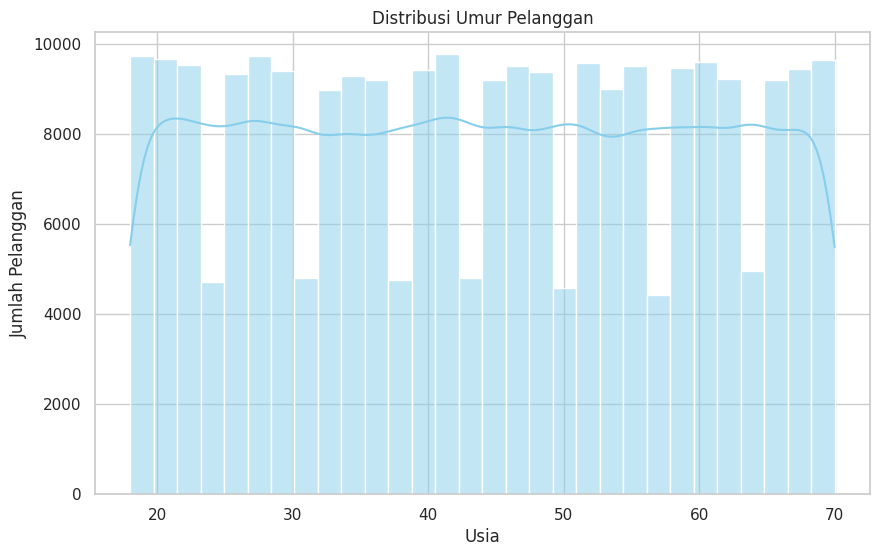

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
    plt.title('Distribusi Umur Pelanggan')
    plt.xlabel('Usia')
    plt.ylabel('Jumlah Pelanggan')
    plt.show()
else:
    print("Kolom 'Age' tidak ditemukan.")


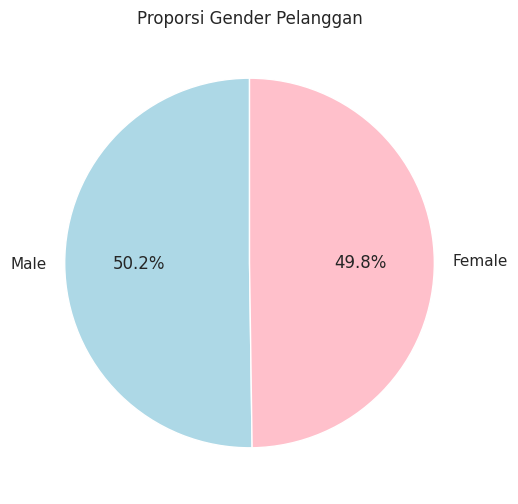

In [43]:
import matplotlib.pyplot as plt

# Pastikan kolom 'Gender' ada
if 'Gender' in df.columns:
    # Pie Chart
    plt.figure(figsize=(8, 6))
    df['Gender'].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'pink'],
        labels=['Male', 'Female']  n
    )
    plt.title('Proporsi Gender Pelanggan')
    plt.ylabel('')  # Menghapus label sumbu y
    plt.show()
else:
    print("Kolom 'Gender' tidak ditemukan di dataset.")


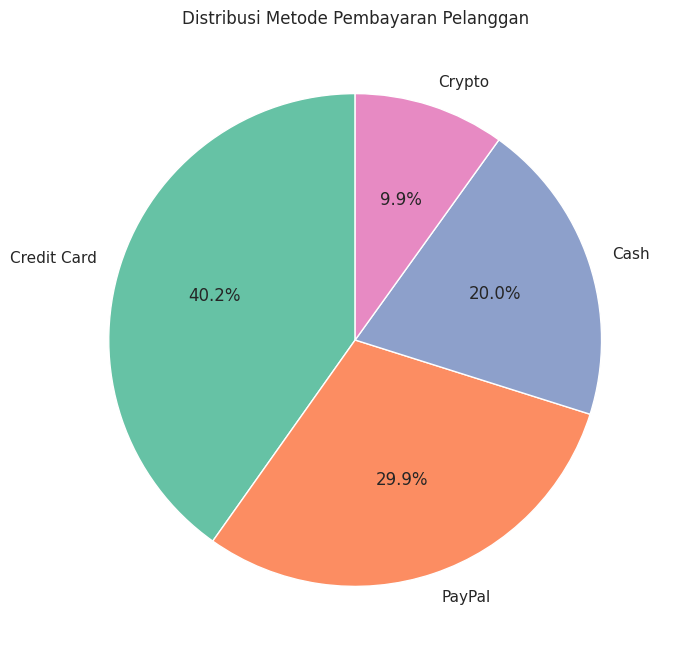

In [44]:
# Memastikan  kolom 'Payment Method' ada
if 'Payment Method' in df.columns:
    payment_counts = df['Payment Method'].value_counts()

    plt.figure(figsize=(8, 8))
    payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(payment_counts)))
    plt.title('Distribusi Metode Pembayaran Pelanggan')
    plt.ylabel('')
    plt.show()
else:
    print("Kolom 'Payment Method' tidak ditemukan.")


<ipython-input-45-7a0fb4a300e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='Set1')


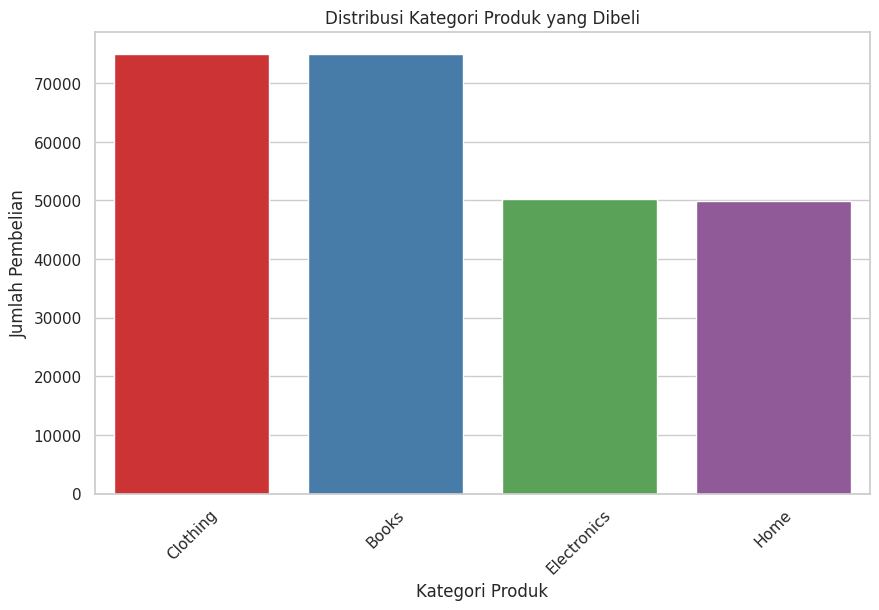

In [45]:
# Pastikan kolom 'Product Category' ada
if 'Product Category' in df.columns:
    product_category_counts = df['Product Category'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='Set1')
    plt.title('Distribusi Kategori Produk yang Dibeli')
    plt.xlabel('Kategori Produk')
    plt.ylabel('Jumlah Pembelian')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'Product Category' tidak ditemukan.")


In [5]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import when, lit

# Inisialisasi Spark Session
spark = SparkSession.builder.appName('E-commerce Buyer Classification').getOrCreate()

# Memuat dataset
df = spark.read.csv("ecommerce_customer.csv", header=True, inferSchema=True)

# Pra-pemrosesan Data
# Menangani nilai null
numerical_cols = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']
for col in numerical_cols:
    df = df.withColumn(col, when(df[col].isNull(), lit(0)).otherwise(df[col]))

# Membuat kolom 'Buyer_Category'
df = df.withColumn(
    'Buyer_Category',
    when(df['Quantity'] < 2, 'Low')
    .when((df['Quantity'] >= 4) & (df['Quantity'] <= 15), 'Medium')
    .otherwise('High')
)

# Periksa distribusi label
df.groupBy('Buyer_Category').count().show()

# Transformasi fitur
buyer_category_indexer = StringIndexer(inputCol='Buyer_Category', outputCol='label')
product_category_indexer = StringIndexer(inputCol='Product Category', outputCol='product_category_index')
payment_method_indexer = StringIndexer(inputCol='Payment Method', outputCol='payment_method_index')
gender_indexer = StringIndexer(inputCol='Gender', outputCol='gender_index')

product_category_encoder = OneHotEncoder(inputCol='product_category_index', outputCol='product_category_vec')
payment_method_encoder = OneHotEncoder(inputCol='payment_method_index', outputCol='payment_method_vec')
gender_encoder = OneHotEncoder(inputCol='gender_index', outputCol='gender_vec')

assembler = VectorAssembler(
    inputCols=[
        'Product Price', 'Total Purchase Amount', 'Customer Age',
        'product_category_vec', 'payment_method_vec', 'gender_vec'
    ],
    outputCol='features'
)

# Mengganti Logistic Regression dengan Random Forest Classifier
rf = RandomForestClassifier(featuresCol='features', labelCol='label', numTrees=100, maxDepth=10, seed=42)

# Membuat Pipeline
pipeline = Pipeline(stages=[
    buyer_category_indexer, product_category_indexer, payment_method_indexer, gender_indexer,
    product_category_encoder, payment_method_encoder, gender_encoder,
    assembler, rf
])

# Membagi data menjadi data pelatihan dan pengujian
train_df, test_df = df.randomSplit([0.7, 0.3], seed=42)

# Melatih model
model = pipeline.fit(train_df)

# Prediksi
predictions = model.transform(test_df)

# Evaluasi Model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f'Akurasi: {accuracy}')

evaluator_f1 = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
f1_score = evaluator_f1.evaluate(predictions)
print(f'F1-Score: {f1_score}')

# Menampilkan prediksi
predictions.select('Buyer_Category', 'label', 'prediction', 'probability').show(20)

# Analisis distribusi prediksi
predictions.groupBy('prediction').count().show()


+--------------+-----+
|Buyer_Category|count|
+--------------+-----+
|          High|99893|
|           Low|50108|
|        Medium|99999|
+--------------+-----+

Akurasi: 0.3992744344857021
F1-Score: 0.35374339644358366
+--------------+-----+----------+--------------------+
|Buyer_Category|label|prediction|         probability|
+--------------+-----+----------+--------------------+
|          High|  1.0|       1.0|[0.39903715638940...|
|        Medium|  0.0|       1.0|[0.38659722580620...|
|        Medium|  0.0|       0.0|[0.39760768005446...|
|        Medium|  0.0|       0.0|[0.42242830849271...|
|           Low|  2.0|       1.0|[0.38763703100532...|
|           Low|  2.0|       1.0|[0.39754171814978...|
|          High|  1.0|       1.0|[0.40034666795089...|
|           Low|  2.0|       1.0|[0.39868154794412...|
|           Low|  2.0|       0.0|[0.41408151643650...|
|        Medium|  0.0|       1.0|[0.38954213440121...|
|          High|  1.0|       0.0|[0.40727080040504...|
|        M

<ipython-input-10-482af31d7875>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Buyer_Category', y='count', data=buyer_category_distribution, palette='viridis')


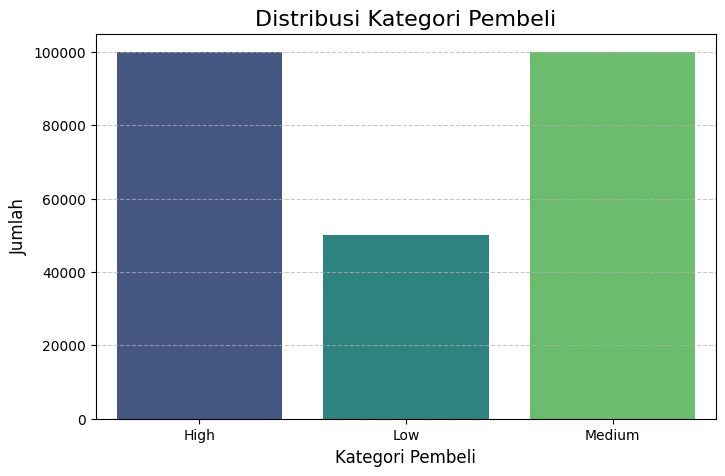

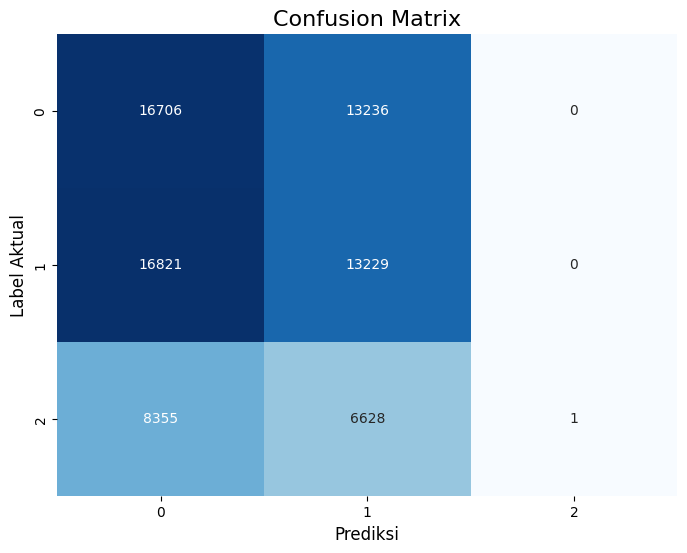

<ipython-input-10-482af31d7875>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction', y='count', data=prediction_distribution, palette='cubehelix')


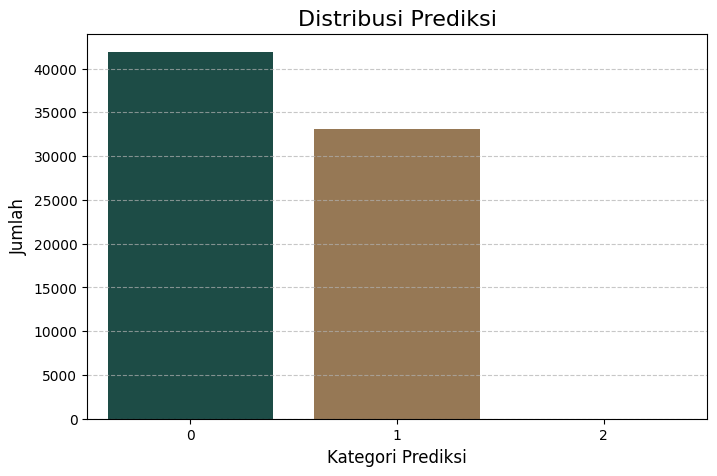

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualisasi Distribusi Kategori Pembeli
buyer_category_distribution = df.groupBy('Buyer_Category').count().toPandas()
buyer_category_distribution['Buyer_Category'] = buyer_category_distribution['Buyer_Category'].astype(str)

plt.figure(figsize=(8, 5))
sns.barplot(x='Buyer_Category', y='count', data=buyer_category_distribution, palette='viridis')
plt.title('Distribusi Kategori Pembeli', fontsize=16)
plt.xlabel('Kategori Pembeli', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 2: Visualisasi Confusion Matrix
from pyspark.sql.functions import col

confusion_matrix_df = predictions.groupBy('label', 'prediction').count().toPandas()
confusion_matrix_df['label'] = confusion_matrix_df['label'].astype(int)
confusion_matrix_df['prediction'] = confusion_matrix_df['prediction'].astype(int)
confusion_matrix = confusion_matrix_df.pivot(index='label', columns='prediction', values='count').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Label Aktual', fontsize=12)
plt.show()

# Step 3: Visualisasi Distribusi Prediksi
prediction_distribution = predictions.groupBy('prediction').count().toPandas()
prediction_distribution['prediction'] = prediction_distribution['prediction'].astype(int)

plt.figure(figsize=(8, 5))
sns.barplot(x='prediction', y='count', data=prediction_distribution, palette='cubehelix')
plt.title('Distribusi Prediksi', fontsize=16)
plt.xlabel('Kategori Prediksi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
